### Task 1:

##### Brightness Adjustment
Use OpenCV to adjust the brightness of the image.  
**Hint:** Increase pixel values to brighten or decrease to darken.

##### Contrast Adjustment
Implement contrast adjustment using OpenCV.  
**Hint:** Use the formula:  

`new_pixel = alpha * pixel + beta`
where `alpha` controls contrast.

##### Gamma Correction
Perform gamma correction on the image.  
**Hint:** Use the formula:  

`output_pixel = input_pixel^(1 / gamma)`


##### Inverse Transformation (Negative)
Convert the image to its negative.  
**Hint:** Subtract each pixel value from 255.

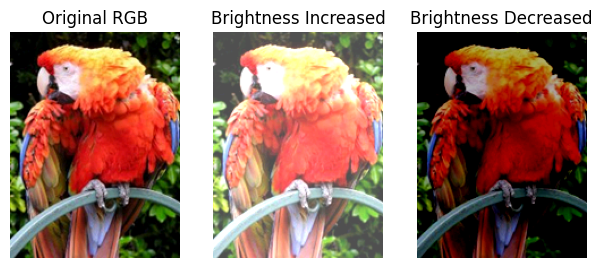

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imgT1 = cv2.imread("RGB_Bit_Depth_24.png")

imgT1RGB = cv2.cvtColor(imgT1, cv2.COLOR_BGR2RGB)

brightVal = 80
brightImgT1RGB = cv2.add(imgT1RGB, np.full(imgT1RGB.shape, brightVal, dtype=np.uint8))

darkVal = 80
darkImgT1RGB = cv2.subtract(imgT1RGB, np.full(imgT1RGB.shape, darkVal, dtype=np.uint8))

plt.subplot(1, 3, 1)
plt.imshow(imgT1RGB)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(brightImgT1RGB)
plt.title("Brightness Increased")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(darkImgT1RGB)
plt.title("Brightness Decreased")
plt.axis('off')

plt.subplots_adjust(left=0.05, right=0.95)

plt.show()

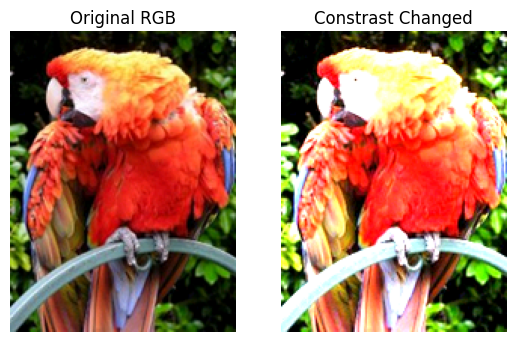

In [35]:
alpha = 1.99
beta = 0

imgT1ContrastAdjustedRGB = np.clip(alpha * imgT1RGB + beta, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(imgT1RGB)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgT1ContrastAdjustedRGB)
plt.title("Constrast Changed")
plt.axis('off')

plt.show()

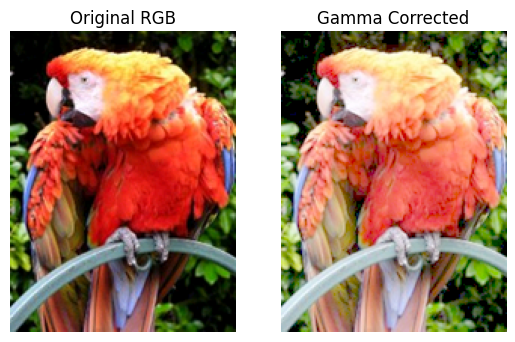

In [33]:
gamma = 2.2

imgT1GammaCorrectedRGB = (np.clip((imgT1RGB / 255.0) ** (1 / gamma), 0, 1) * 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(imgT1RGB)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgT1GammaCorrectedRGB)
plt.title("Gamma Corrected")
plt.axis('off')

plt.show()

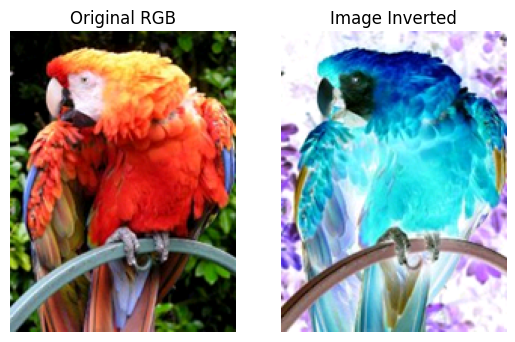

In [69]:
imgT1RGBInverted = cv2.subtract(np.full(imgT1RGB.shape, 255, dtype=np.uint8), imgT1RGB)

plt.subplot(1, 2, 1)
plt.imshow(imgT1RGB)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgT1RGBInverted)
plt.title("Image Inverted")
plt.axis('off')

plt.show()

### Task 2:

##### Diadic Operations on Colored Images

Implement the following diadic operations on colored images of your choice. Explain the effect of each operation on the image in one line with the output.

a) **Addition**<br>
b) **Subtraction**<br>
c) **Multiplication**<br>
d) **Division**

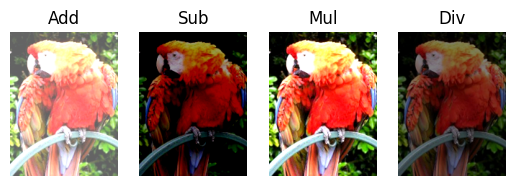

In [48]:
addVal = 100
imgT2RGBAdd = cv2.add(imgT1RGB, np.full(imgT1RGB.shape, addVal, dtype=np.uint8))

subVal = 100
imgT2RGBSub = cv2.subtract(imgT1RGB, np.full(imgT1RGB.shape, addVal, dtype=np.uint8))

mulVal = 1.5
imgT2RGBMul = np.clip(mulVal * imgT1RGB, 0, 255).astype(np.uint8)

divVal = 2
imgT2RGBDiv = np.clip(imgT1RGB / divVal, 0, 255).astype(np.uint8)

plt.subplot(1, 4, 1)
plt.imshow(imgT2RGBAdd)
plt.title("Add")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imgT2RGBSub)
plt.title("Sub")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imgT2RGBMul)
plt.title("Mul")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imgT2RGBDiv)
plt.title("Div")
plt.axis('off')

plt.show()

### Task 3:

##### Green Screen Effect:

Replace the background of the given image with three other backgrounds of your choice. Do NOT use library, do NOT write code in form of a complex functions (which are available on internet). Write the code from scratch using the method taught ONLY. 

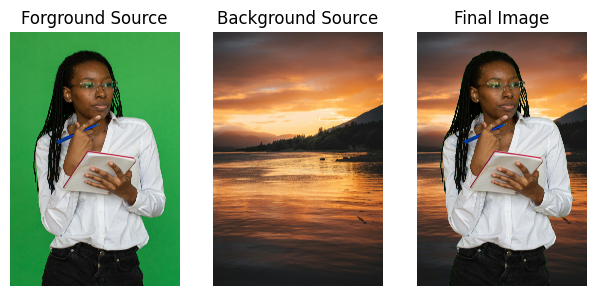

In [56]:
imgT3Foreground = cv2.imread("Pexels_Edited_Greenscreen_Foreground.jpg")
imgT3ForegroundHSV = cv2.cvtColor(imgT3Foreground, cv2.COLOR_BGR2HSV)

imgT3Background = cv2.imread("Pexels_Background.jpg")
imgT3BackgroundRGB = cv2.cvtColor(imgT3Background, cv2.COLOR_BGR2RGB)

lowerGreen = np.array([35, 100, 100])
upperGreen = np.array([85, 255, 255])

mask = cv2.inRange(imgT3ForegroundHSV, lowerGreen, upperGreen)
maskInverted = cv2.bitwise_not(mask)

forgroundIsolated = cv2.bitwise_and(imgT3ForegroundHSV, imgT3ForegroundHSV, mask=maskInverted)
forgroundIsolatedRGB = cv2.cvtColor(forgroundIsolated, cv2.COLOR_HSV2RGB)

backgroundInvertedMaskRGB = cv2.bitwise_and(imgT3BackgroundRGB, imgT3BackgroundRGB, mask=mask)

finalImage = cv2.add(forgroundIsolatedRGB, backgroundInvertedMaskRGB)

imgT3ForegroundRGB = cv2.cvtColor(imgT3Foreground, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(imgT3ForegroundRGB)
plt.title("Forground Source")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imgT3BackgroundRGB)
plt.title("Background Source")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(finalImage)
plt.title("Final Image")
plt.axis('off')

plt.subplots_adjust(left=0.05, right=0.95)

plt.show()

### Task 4:

##### Vehicle Motion detection:

The following two pictures are video frames from the same video which are fraction of seconds apart. There is almost no difference in them to naked eye. Find out which signal is open for the traffic to move i.e. on which lanes the traffic is moving on the road. Use a suitable image processing operation on these to answer the question.

#### Images for this task are not displayed nor are they included in the repo since they are watermarked and I don't want to infringe on any copyright.

In [ ]:
imgT4A = cv2.imread("Task4_FrameA.png")
imgT4B = cv2.imread("Task4_FrameB.png")

imgT4AGray = cv2.cvtColor(imgT4A, cv2.COLOR_BGR2GRAY)
imgT4BGray = cv2.cvtColor(imgT4B, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(imgT4AGray, imgT4BGray)

threshold = 20
_, imgT4MovementMap = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

plt.imshow(imgT4MovementMap)
plt.title("Movement")
plt.axis('off')
plt.show()